# Importing all the important libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix  

---


# Data Preproccesing

## Importing data

In [2]:
df = pd.read_csv("heart_failure.csv",sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Data Visualisation

<AxesSubplot:title={'center':'Platelets'}, xlabel='platelets', ylabel='age'>

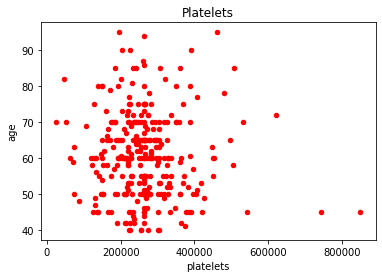

In [3]:
df.plot.scatter(x='platelets', y='age', title='Platelets',color = "red")

<AxesSubplot:>

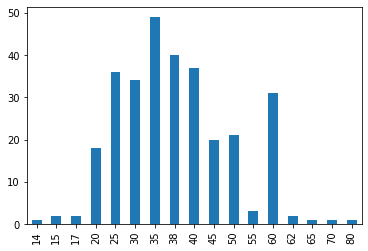

In [4]:
df['ejection_fraction'].value_counts().sort_index().plot.bar()

<AxesSubplot:xlabel='serum_sodium'>

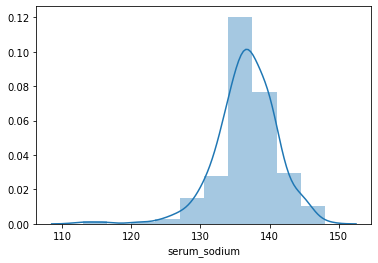

In [5]:
import seaborn as sns
sns.distplot(df['serum_sodium'], bins=10, kde=True)

<AxesSubplot:xlabel='age', ylabel='diabetes'>

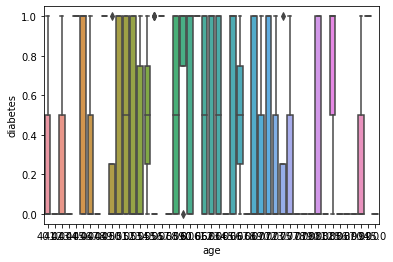

In [6]:
sns.boxplot( 'age','diabetes',data=df)

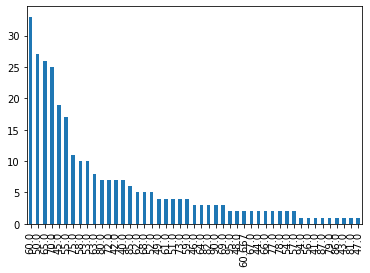

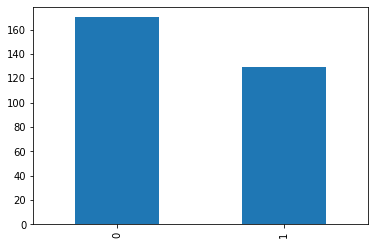

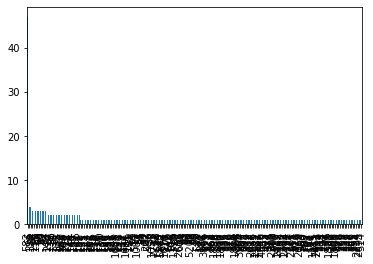

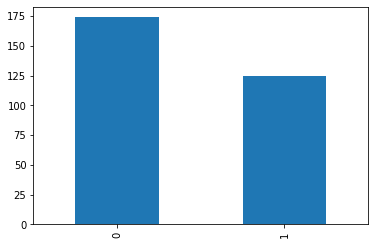

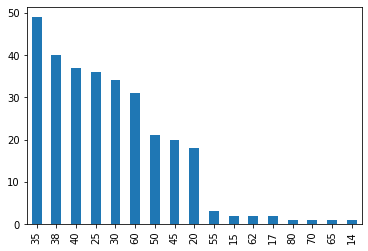

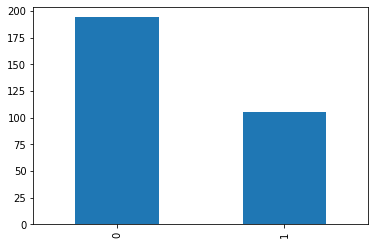

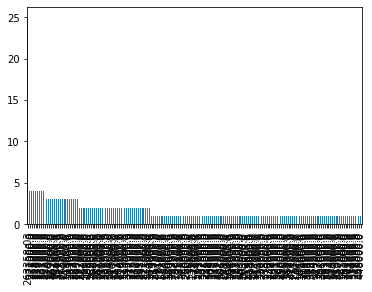

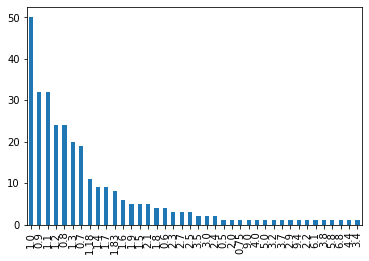

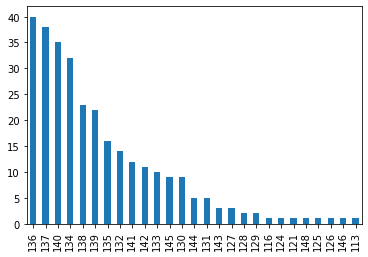

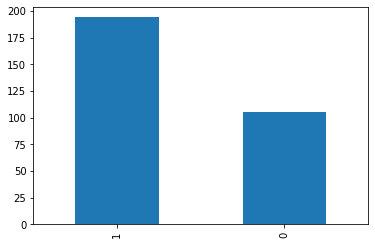

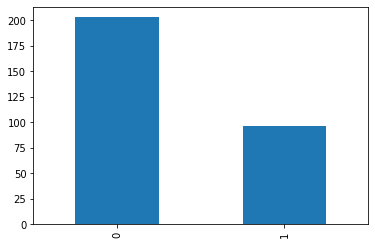

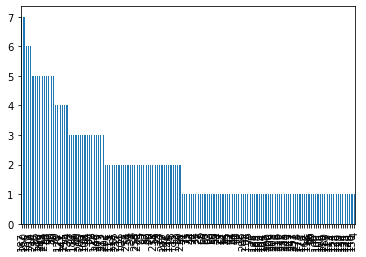

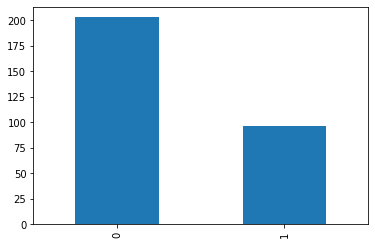

In [7]:
for col in df.columns:
    df[col].value_counts().plot.bar()
    plt.show()

# Data analysis

### Checking out the features

In [8]:

df_dedupped = df.drop_duplicates()

# there were duplicate rows
print(df.shape)
print(df_dedupped.shape)

(299, 13)
(299, 13)


In [9]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

age - 0%
anaemia - 0%
creatinine_phosphokinase - 0%
diabetes - 0%
ejection_fraction - 0%
high_blood_pressure - 0%
platelets - 0%
serum_creatinine - 0%
serum_sodium - 0%
sex - 0%
smoking - 0%
time - 0%
DEATH_EVENT - 0%


In [10]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts().sort_index())

---- age ---
40.000     7
41.000     1
42.000     7
43.000     1
44.000     2
45.000    19
46.000     3
47.000     1
48.000     2
49.000     4
50.000    27
51.000     4
52.000     5
53.000    10
54.000     2
55.000    17
56.000     1
57.000     2
58.000    10
59.000     4
60.000    33
60.667     2
61.000     4
62.000     5
63.000     8
64.000     3
65.000    26
66.000     2
67.000     2
68.000     5
69.000     3
70.000    25
72.000     7
73.000     4
75.000    11
77.000     2
78.000     2
79.000     1
80.000     7
81.000     1
82.000     3
85.000     6
86.000     1
87.000     1
90.000     3
94.000     1
95.000     2
Name: age, dtype: int64
---- anaemia ---
0    170
1    129
Name: anaemia, dtype: int64
---- creatinine_phosphokinase ---
23      1
30      1
47      3
52      1
53      1
       ..
4540    1
5209    1
5882    1
7702    1
7861    1
Name: creatinine_phosphokinase, Length: 208, dtype: int64
---- diabetes ---
0    174
1    125
Name: diabetes, dtype: int64
---- ejection_fraction

### Converting the dtype 
Converting all the booleans having int64 as dtype to bool 

In [11]:
df[['anaemia','diabetes','high_blood_pressure','sex','smoking']] = df[['anaemia','diabetes','high_blood_pressure','sex','smoking']].astype(bool)

### Binning Age 

Finding quantile

In [12]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = df['age'].quantile(quantile_list)
quantiles

0.00    40.0
0.25    51.0
0.50    60.0
0.75    70.0
1.00    95.0
Name: age, dtype: float64

Text(0, 0.5, 'Frequency')

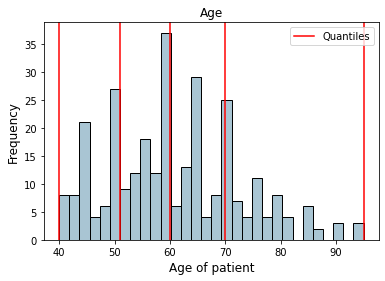

In [13]:
fig, ax = plt.subplots()
df['age'].hist(bins=30, color='#A9C5D3', 
                             edgecolor='black', grid=False)
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
    ax.legend([qvl], ['Quantiles'], fontsize=10)
    ax.set_title('Age', fontsize=12)
ax.set_xlabel('Age of patient', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

Using quantile bin the age 

In [14]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
df['age_quantile_label'] = pd.qcut(df['age'], 
                                   q=quantile_list,       
                                   labels=quantile_labels)

Let us now convert this catagorical data to numeric one

In [15]:
encoder = LabelEncoder()
age_labels = encoder.fit_transform(df['age_quantile_label'])
age_mappings = {index: label for index, label in 
                  enumerate(encoder.classes_)}
age_mappings

{0: '0-25Q', 1: '25-50Q', 2: '50-75Q', 3: '75-100Q'}

In [16]:
df['age_quantile_label'] = age_labels
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_quantile_label
0,75.0,False,582,False,20,True,265000.00,1.9,130,True,False,4,1,3
1,55.0,False,7861,False,38,False,263358.03,1.1,136,True,False,6,1,1
2,65.0,False,146,False,20,False,162000.00,1.3,129,True,True,7,1,2
3,50.0,True,111,False,20,False,210000.00,1.9,137,True,False,7,1,0
4,65.0,True,160,True,20,False,327000.00,2.7,116,False,False,8,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,False,61,True,38,True,155000.00,1.1,143,True,True,270,0,2
295,55.0,False,1820,False,38,False,270000.00,1.2,139,False,False,271,0,1
296,45.0,False,2060,True,60,False,742000.00,0.8,138,False,False,278,0,0
297,45.0,False,2413,False,38,False,140000.00,1.4,140,True,True,280,0,0


In [58]:
final_df = df[['anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'age_quantile_label', 'DEATH_EVENT']]
final_df

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,age_quantile_label,DEATH_EVENT
0,False,582,False,20,True,265000.00,1.9,130,True,False,4,3,1
1,False,7861,False,38,False,263358.03,1.1,136,True,False,6,1,1
2,False,146,False,20,False,162000.00,1.3,129,True,True,7,2,1
3,True,111,False,20,False,210000.00,1.9,137,True,False,7,0,1
4,True,160,True,20,False,327000.00,2.7,116,False,False,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,61,True,38,True,155000.00,1.1,143,True,True,270,2,0
295,False,1820,False,38,False,270000.00,1.2,139,False,False,271,1,0
296,False,2060,True,60,False,742000.00,0.8,138,False,False,278,0,0
297,False,2413,False,38,False,140000.00,1.4,140,True,True,280,0,0


## Scaling and converting the data

Let us split the data first

In [59]:
X=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

Let us now transform it

In [60]:
sc_train = StandardScaler()
sc_train.fit_transform(X_train)
sc_test = StandardScaler()
sc_test.fit_transform(X_test)

array([[-8.74474632e-01, -3.58454323e-01, -8.16496581e-01,
         7.61870211e-02, -6.54653671e-01, -5.55254768e-01,
        -1.40534916e-01, -6.83998109e-01, -1.52752523e+00,
        -6.80745646e-01,  1.43626749e+00,  4.97576331e-01],
       [-8.74474632e-01, -4.50636153e-01, -8.16496581e-01,
        -1.63802095e+00, -6.54653671e-01, -1.01707659e+00,
         3.35748947e-03, -1.53018134e+00,  6.54653671e-01,
         1.46897745e+00, -1.34473587e+00,  4.97576331e-01],
       [-8.74474632e-01,  1.49233670e-01,  1.22474487e+00,
         7.61870211e-02, -6.54653671e-01, -1.28287425e-01,
         7.22819519e-01, -4.72452302e-01,  6.54653671e-01,
        -6.80745646e-01,  1.06235107e+00, -4.35379289e-01],
       [-8.74474632e-01,  1.49233670e-01, -8.16496581e-01,
        -2.09514308e-01, -6.54653671e-01,  9.26060503e-01,
        -4.28319728e-01,  1.85455157e+00,  6.54653671e-01,
        -6.80745646e-01, -7.13751911e-01, -1.36833491e+00],
       [-8.74474632e-01,  2.70831136e+00,  1.2247448



---



# Time to find the model

## Finding the best value

In [61]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [62]:
accuracy_score(y_train, dt.predict(X_train)),accuracy_score(y_test, dt.predict(X_test))

(1.0, 0.7833333333333333)

In [63]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7625

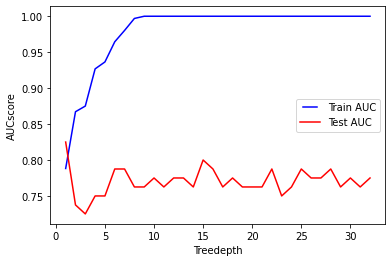

In [64]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)   
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUCscore")
plt.xlabel("Treedepth")
plt.show()

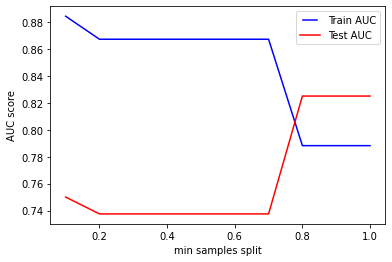

In [65]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(X_train, y_train)   
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)   
   y_pred = dt.predict(X_test)   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.show()

In [73]:
classifier = DecisionTreeClassifier(criterion= 'entropy', max_depth=None,max_features= 6, min_samples_leaf= 4)
classifier.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_features=6, min_samples_leaf=4)

In [74]:
accuracy_score(y_train, classifier.predict(X_train)),accuracy_score(y_test, classifier.predict(X_test))

(0.9205020920502092, 0.9)

In [77]:
cf_matrix=confusion_matrix(y_test,classifier.predict(X_test))

<AxesSubplot:>

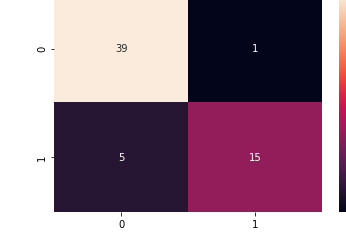

In [78]:
sns.heatmap(cf_matrix, annot=True)